# TELECOM CHURN ANALYSIS

### DATASET INFO: SAMPLE DATA SET CONTAINING  TELECOM CUSTOMER DATA ANALYSIS AND CUSTOMERS THAT LEFT LAST MONTH

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline


##### Load the data file

In [2]:
telco = pd.read_csv(r"C:\ChurnAnalysis_ML project\WA_Fn-UseC_-Telco-Customer-Churn.csv")

##### Displaying the original dataset

In [3]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco.shape #how many rows and columns

(7043, 21)

In [5]:
telco.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
#Checking the datatypes of the variables
telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#Check the description statistics of numeric variables
telco.describe() 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


###### Senior citizen is actually a categorical, hence the 25%-50%-75% distribution is not proper.
###### 75% customers have tenure less than 55 months.
###### Avg. Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.95 per month.



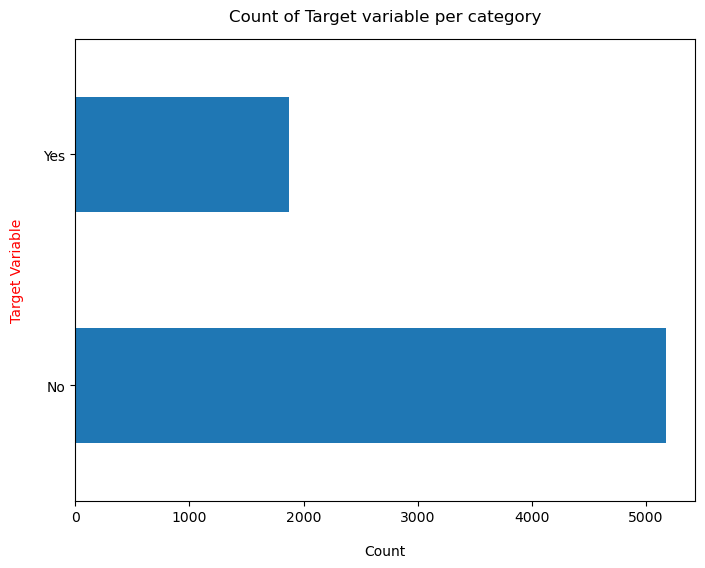

In [8]:
telco['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14, color='red')
plt.title("Count of Target variable per category" ,y=1.02);
plt.show()

In [9]:
 100*telco['Churn'].value_counts()/len(telco['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [10]:
telco['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

###### Data is highly imbalanced, ratio=73:27
###### so we analyse data with other features while taking the target values separately to get some insights.

In [11]:
# Concis summary of the Dataframe, as we have too many columns, we are using the verbose
telco.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


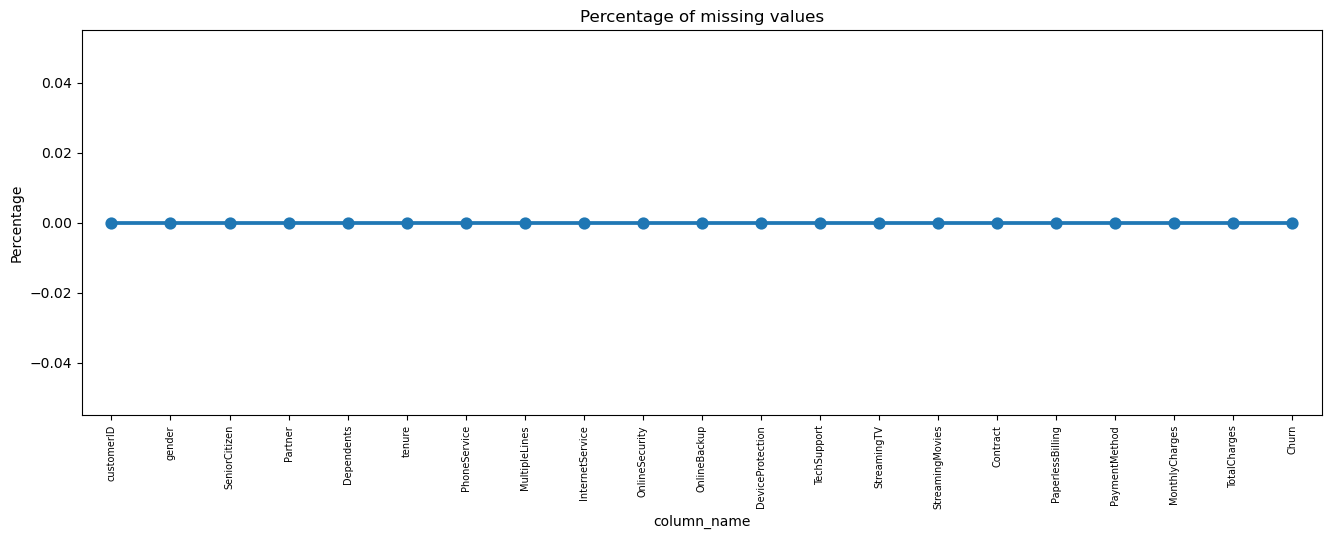

In [12]:
missing = pd.DataFrame((telco.isnull().sum())*100/telco.shape[0]).reset_index()
missing.columns = ['column_name', 'missing_percentage']
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='column_name', y='missing_percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of missing values")
plt.ylabel("Percentage")
plt.show()


#### Missing Data - Initial Intuition
Here, we don't have any missing data.
General Thumb Rules:

For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

## Data Cleaning
1. Create a copy of base data for manupulation & processing

In [13]:
telco_data=telco.copy()

2. Total Charges should be numeric amount. Let's convert it to numerical data type

In [14]:
#since int dtype can't contain null val., so pandas upgrade it to float.
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##### 3) As we can see 11 missing values in Total Charges column; checking the records

In [15]:
telco_data.loc[telco_data['TotalCharges'].isnull()==True]
#total charges where null value is present.
#loc= label based indexer in pandas- used to sleect rows and columns from a DataFrame by labels, rather than by position.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


##### 4)Missing Value Treatment
Since the % of records compared to the total dataset is very low, i.e., 0.15%, it is safe to ignore them from further processing.

In [16]:
#Removing missing values
telco_data.dropna(how='any', inplace= True)
#telco_data.fillna(0)

##### 5) Divide Customers into bins based on tenure, e.g for tenure< 12 months: assign a tenure group if 1-12, for tenure bet. 1-2 yrs, tenure grp of 13-24; so on

In [17]:
#Get the max tenure
print(telco_data['tenure'].max())

72


In [18]:
#Grouping tenure in the form of bins of 12 months
labels=["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
telco_data['tenure_group'] = pd.cut(telco_data.tenure,range(1,80,12), right= False, labels=labels)

In [19]:
telco_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

##### 6) Remove columns not required for processing

In [20]:
#drop columns cutomerID and tenure
telco_data.drop(columns=['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## DATA EXPLORATION
PLOT DISTRIBUTION OF INDIVIDUAL CHURN PREDICTORS



#### UNIVARIATE ANALYSIS

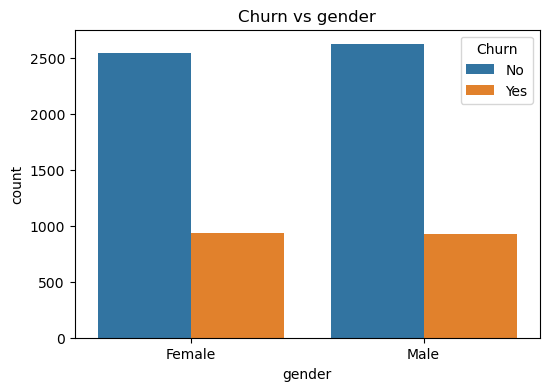

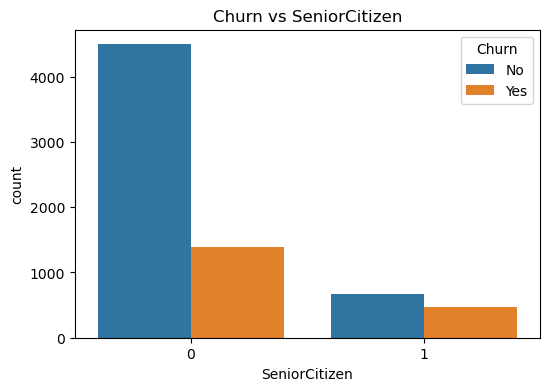

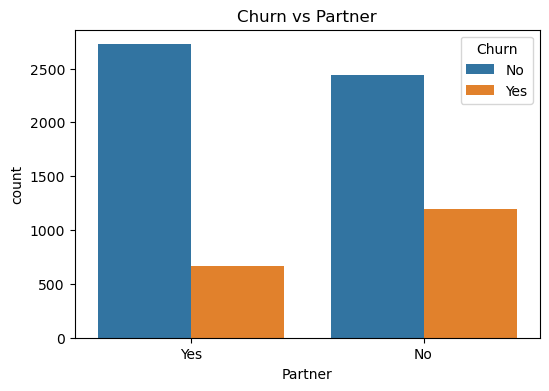

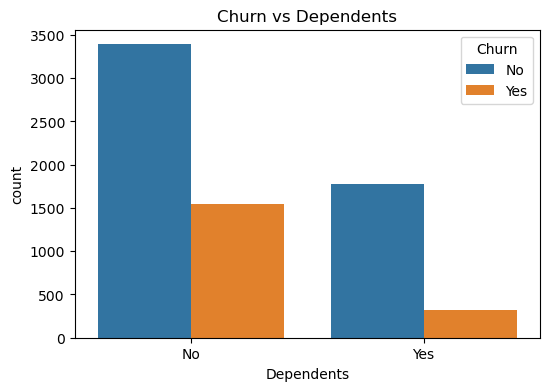

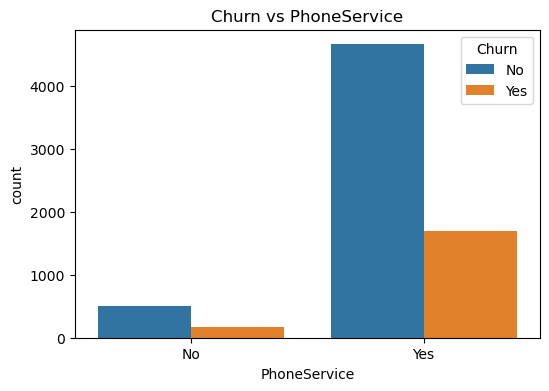

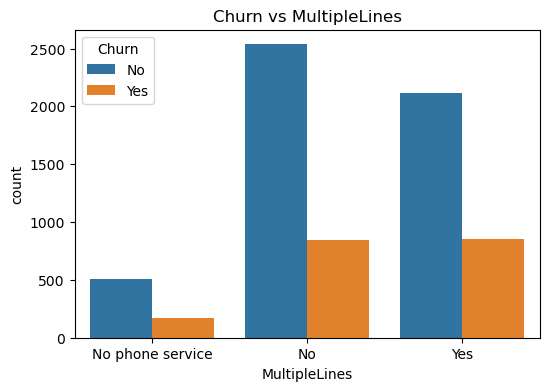

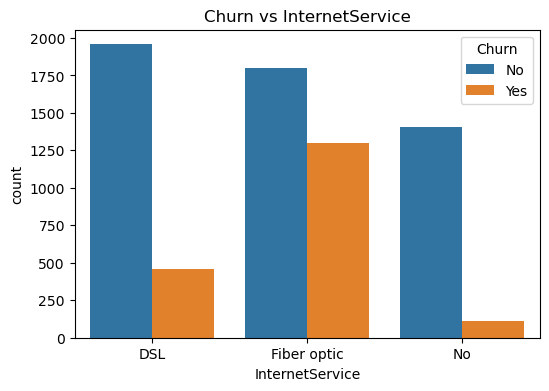

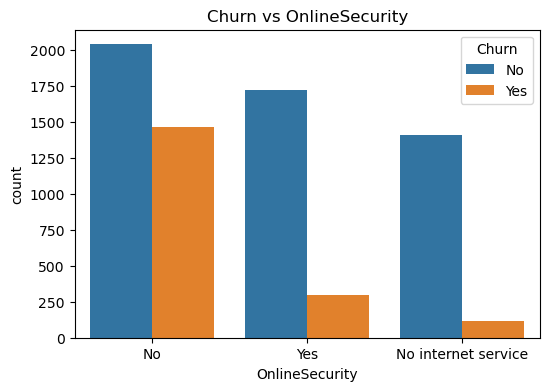

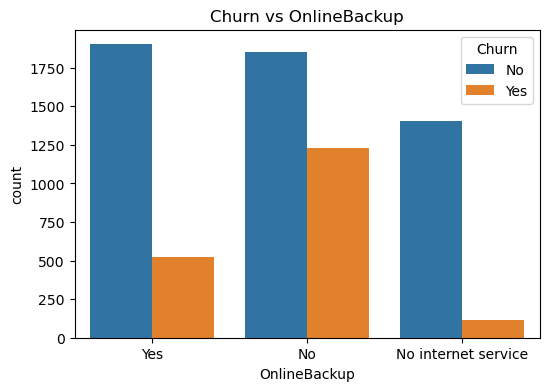

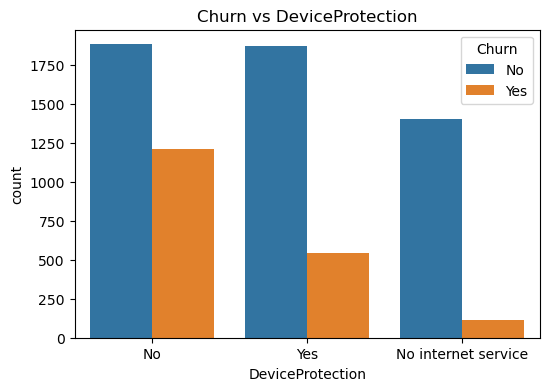

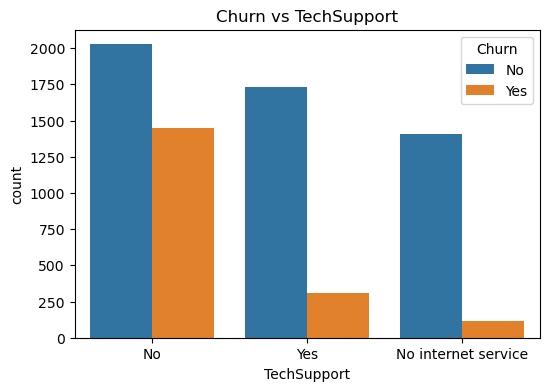

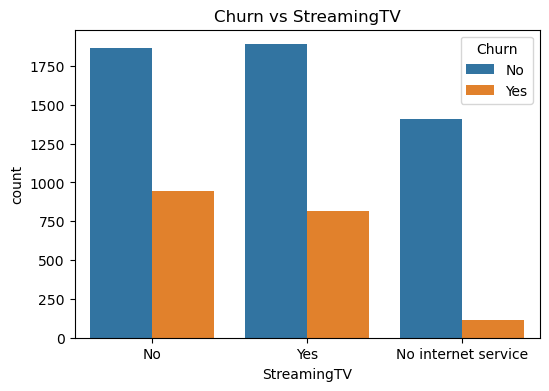

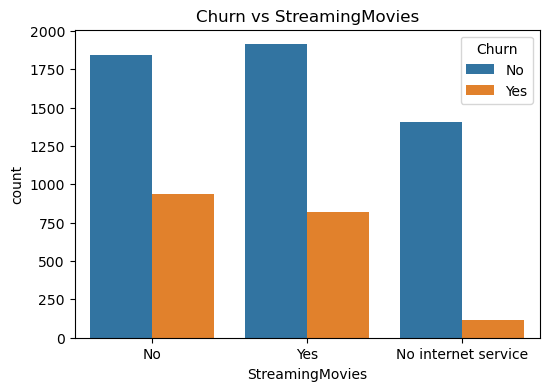

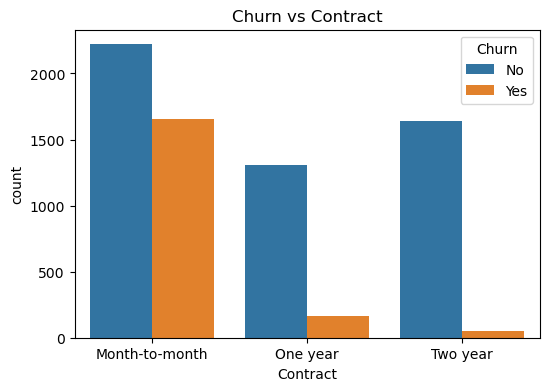

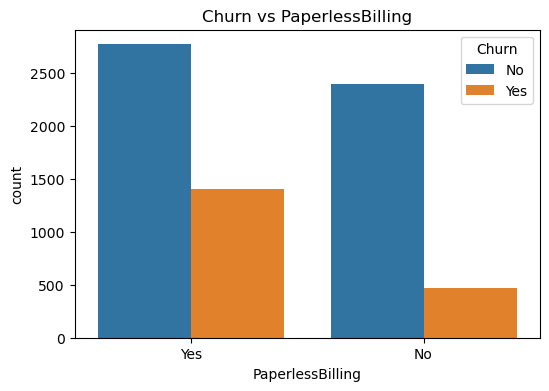

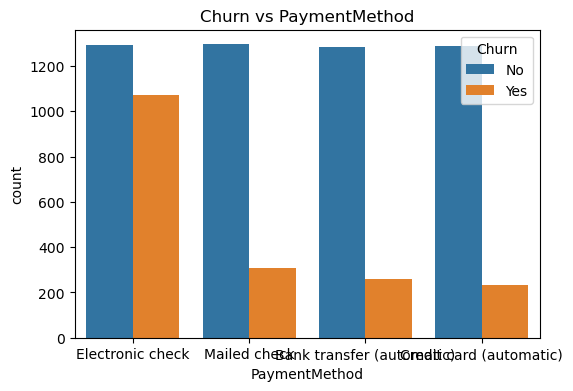

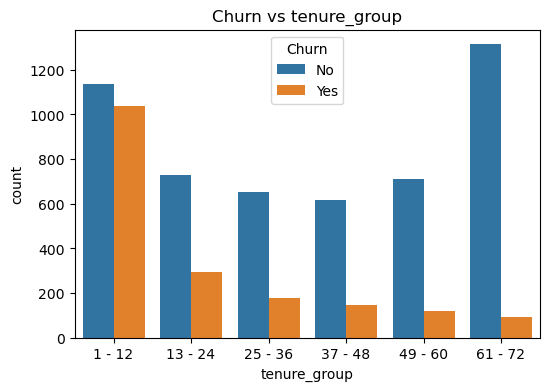

In [21]:
for i, predictor in enumerate(
    telco_data.drop(columns=['Churn','TotalCharges','MonthlyCharges']).columns
):
    plt.figure(figsize=(6,4))   # fresh blank figure each time
    ax = sns.countplot(data=telco_data, x=predictor, hue='Churn')
    plt.title(f"Churn vs {predictor}")
    plt.legend(title="Churn")   # reset legend properly
    plt.show()                  # display and clear


In [22]:
####for i, predictor in enumerate(telco_data.drop(columns=['Churn' ,'TotalCharges', 'MonthlyCharges', 'MonthlyCharges'])):
####    plt.figure(i)
####    sns.countplot(data=telco_data, x=predictor, hue='Churn')
    
####    plt.show()

##### 2) Convert the target variable 'Churn' in a binary numeric variable i.e, Yes=1; No=0

In [23]:
telco_data['Churn']=np.where(telco_data.Churn=='Yes',1,0)

In [24]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [25]:
telco_data_dummies=pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


##### 9. Relationsip between Monthly charges and total Charges


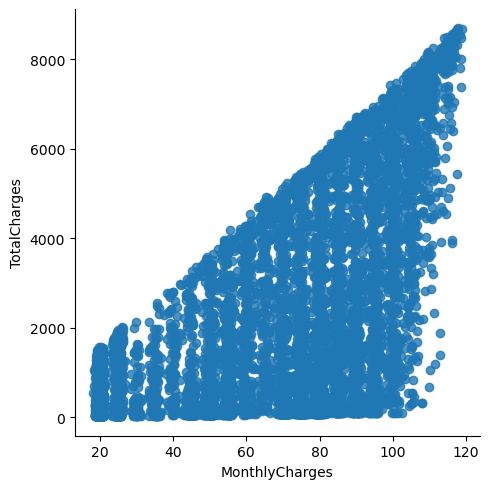

In [26]:
sns.lmplot(data=telco_data_dummies, 
           x='MonthlyCharges', 
           y='TotalCharges', 
           fit_reg=False, 
           hue=None, 
           col=None)
plt.show()


##### Total Charges increase as Monthly Charges increase - as expected.

##### 10. Churn by Monthly Charges and Total Charges

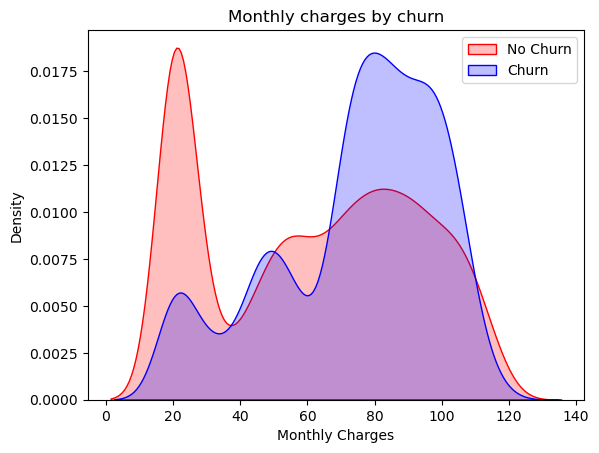

In [27]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')
plt.show()

###### Insight: Churn is high when Monthly Charges ar high

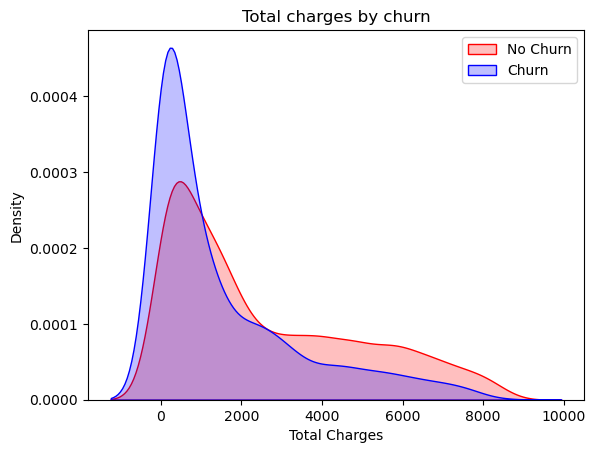

In [28]:
Mth = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total charges by churn')
plt.show()

###### **Surprising insight ** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

Build a correlation of all predictors with Churn.

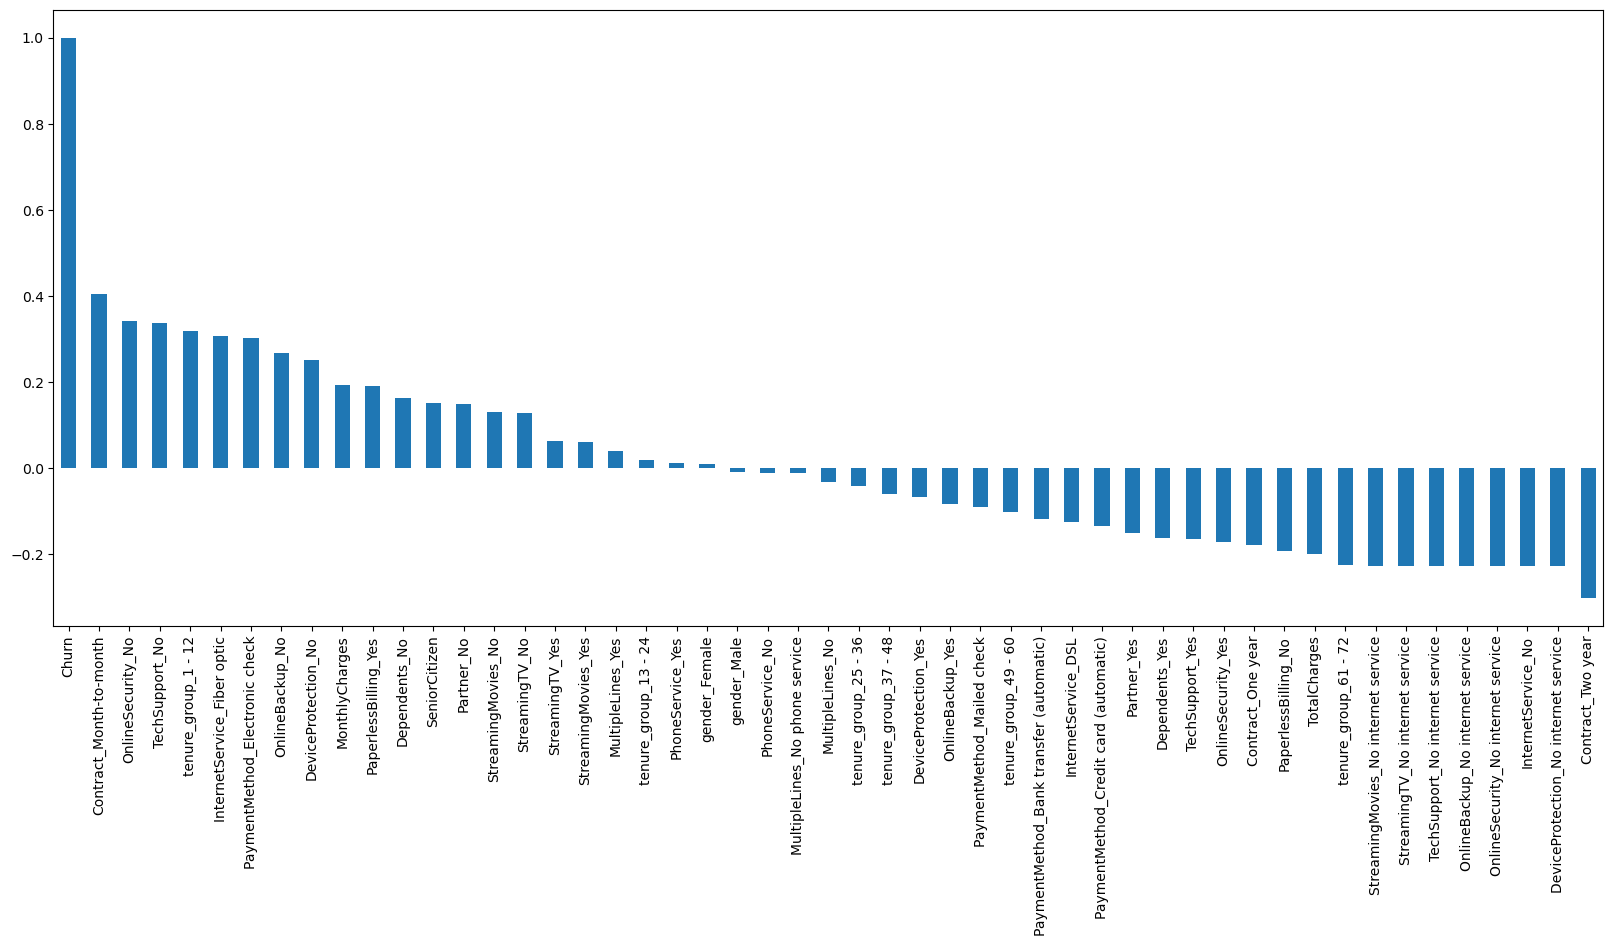

In [29]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [30]:
#Shows which features are positively/negatively correlated with Churn.

#Insights:

#High churn = Month-to-month contract, No online security, No tech support, Fiber optic internet.

#Low churn = Long contracts, No internet service, Long tenure (> 5 years).

#Gender, phone service, multiple lines -> no impact (correlation ≈ 0).

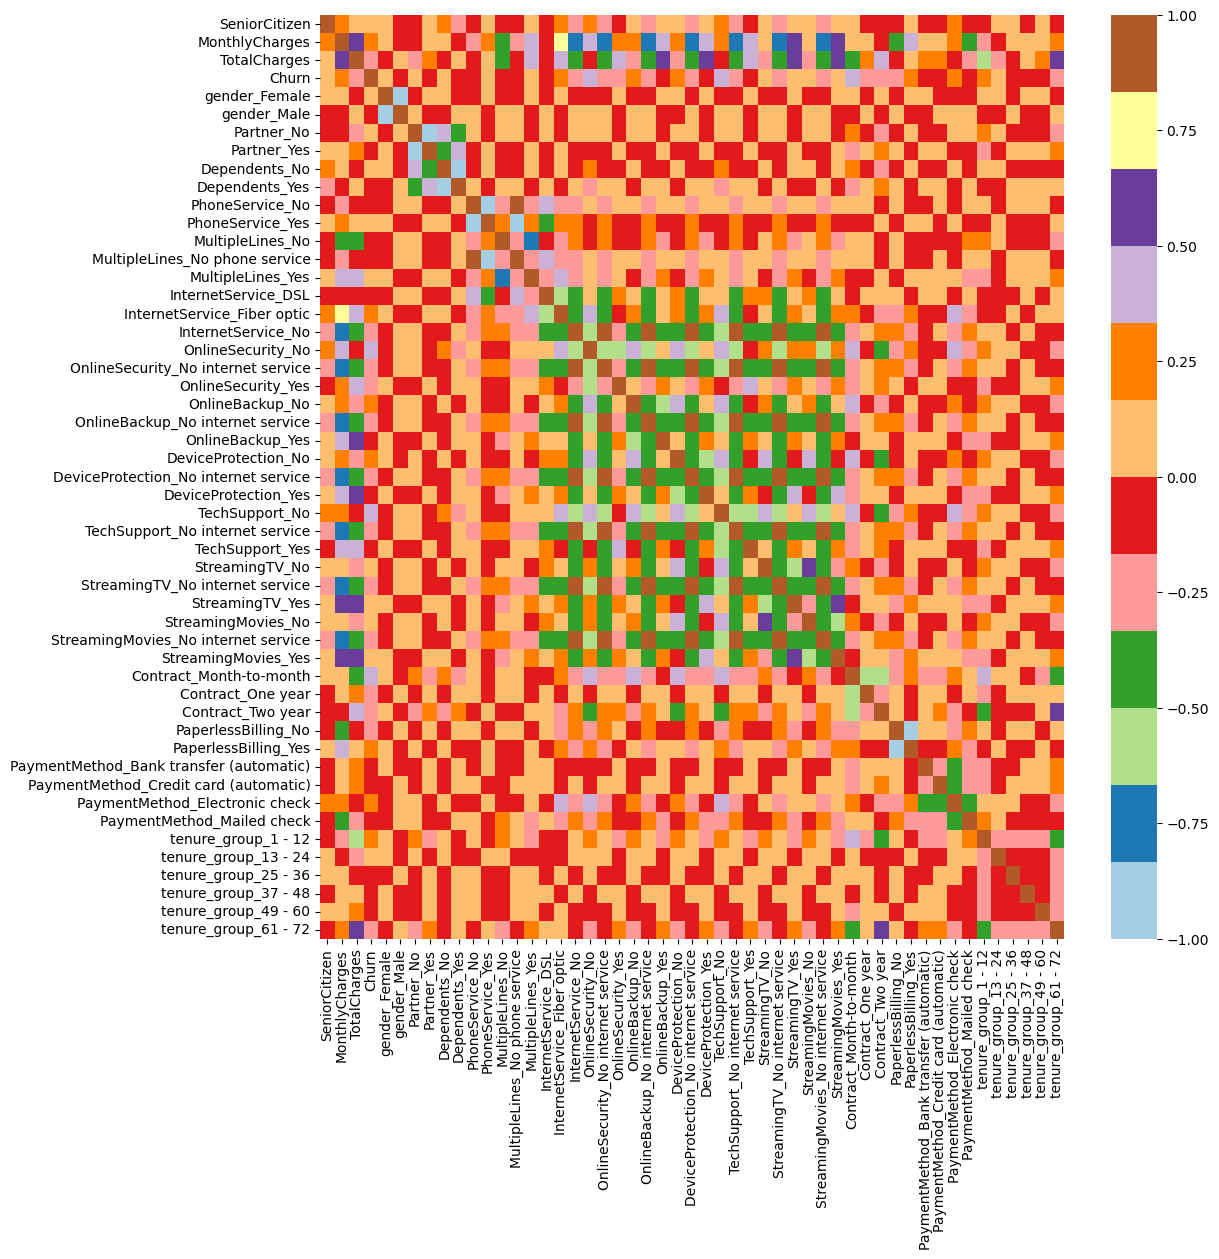

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")
plt.show()

### Bivariate Analysis

In [32]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]


In [33]:
def uniplot(df, col, title, hue='gender'):
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    sns.set_style("white")  # No grid
    sns.countplot(data=df, x=col, hue=hue, order=df[col].value_counts().index)

    plt.title(title)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.yscale('linear')  # Normal axis (no log scale)
    plt.tight_layout()
    plt.show()


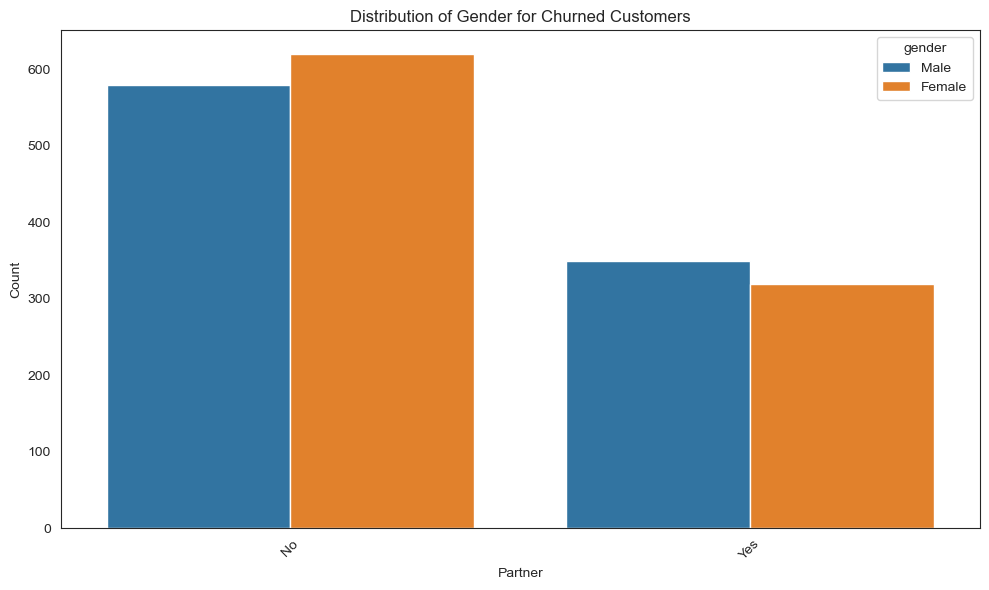

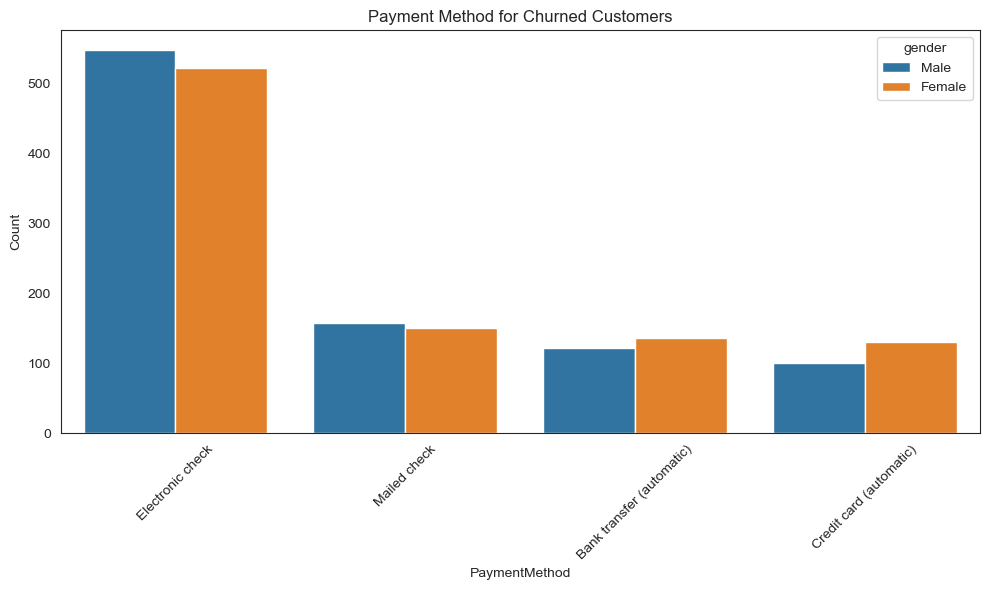

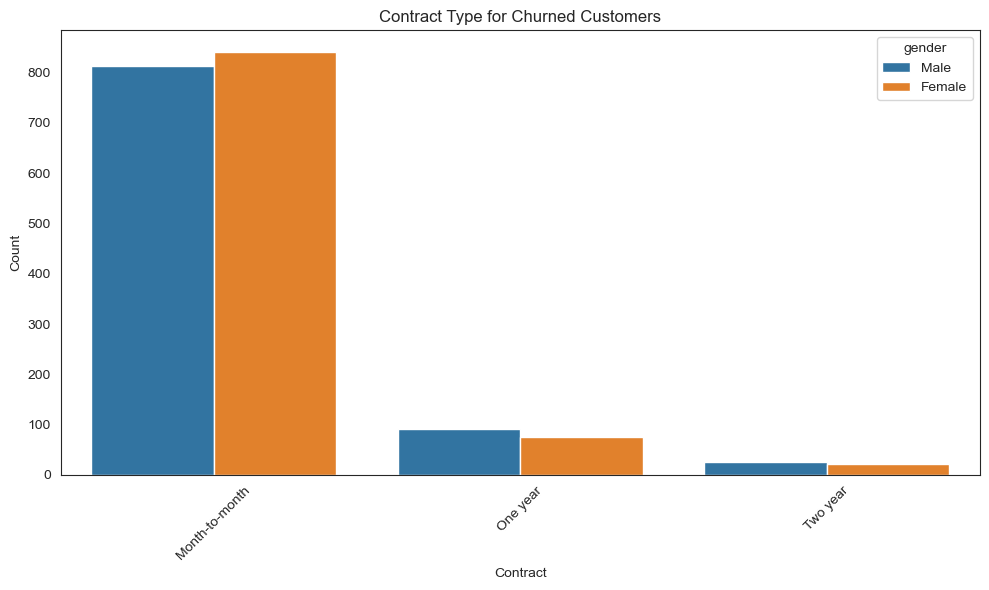

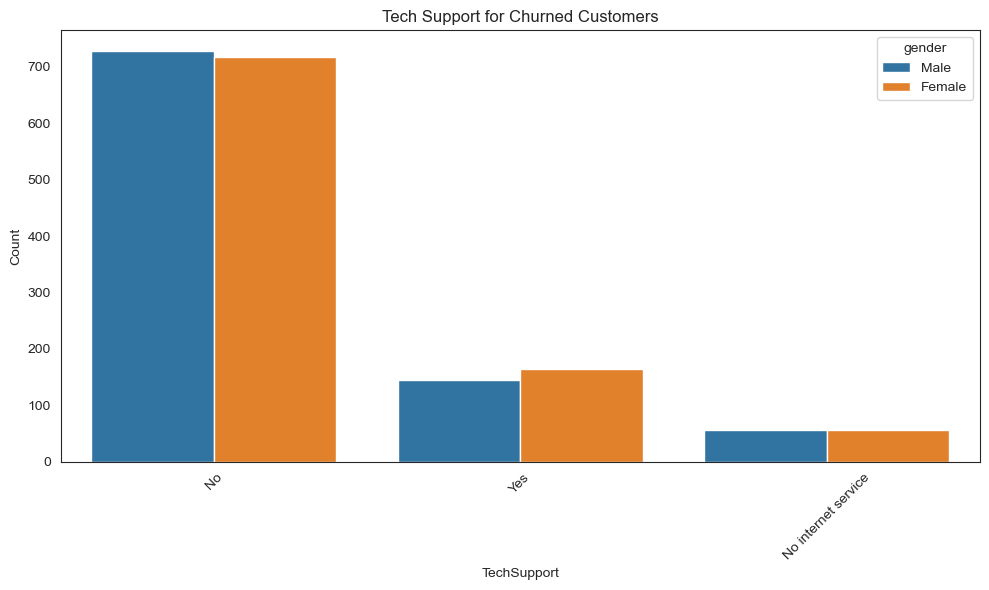

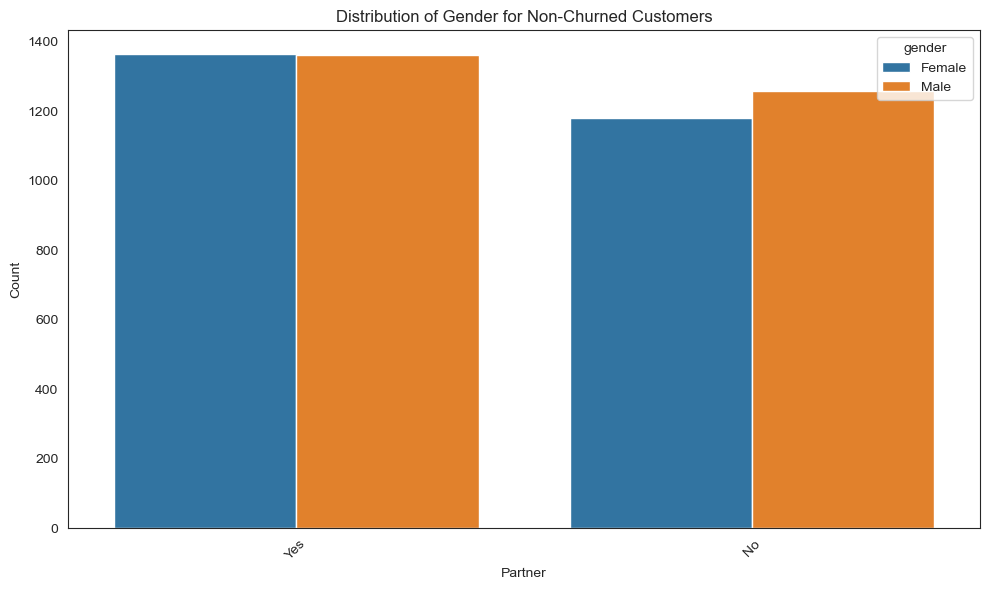

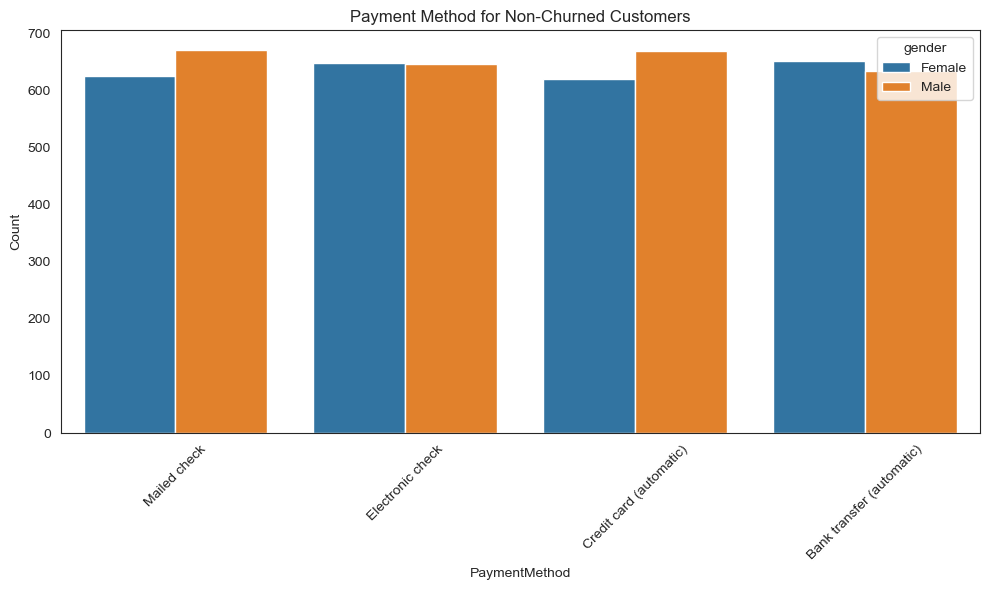

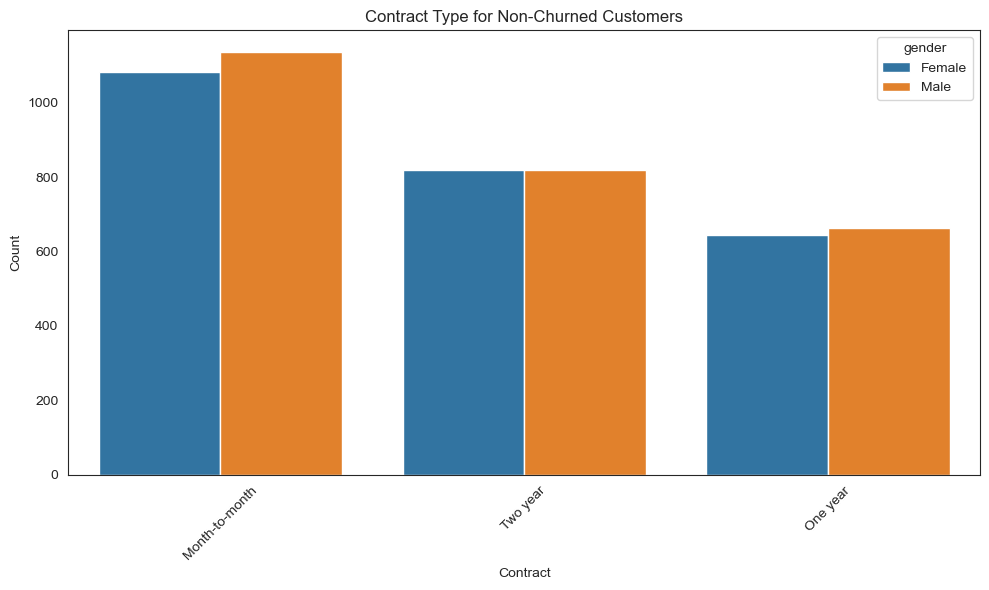

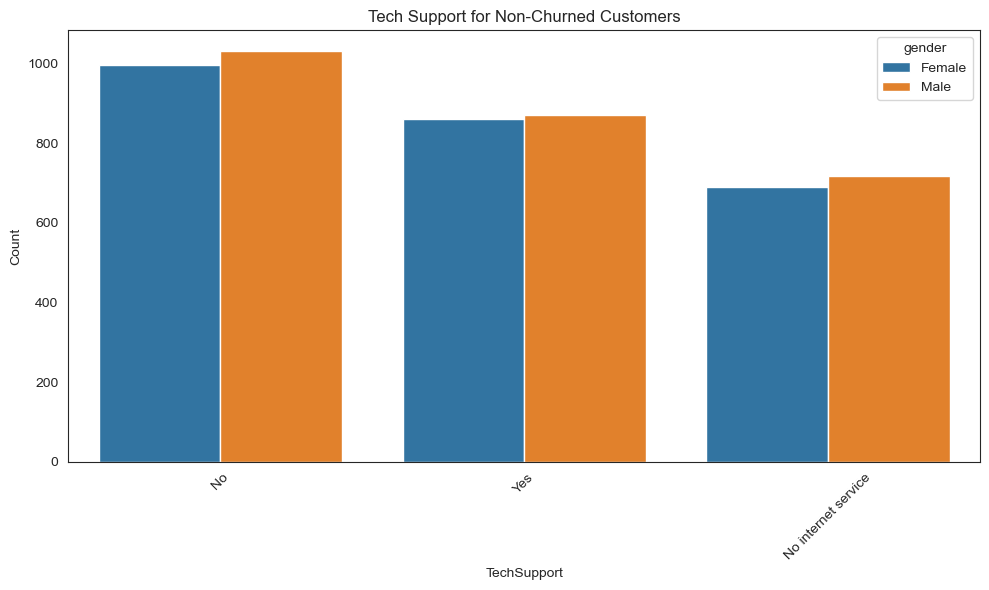

In [34]:
# For Churned Customers
uniplot(new_df1_target1, col='Partner', title='Distribution of Gender for Churned Customers')
uniplot(new_df1_target1, col='PaymentMethod', title='Payment Method for Churned Customers')
uniplot(new_df1_target1, col='Contract', title='Contract Type for Churned Customers')
uniplot(new_df1_target1, col='TechSupport', title='Tech Support for Churned Customers')

# For Non-Churned Customers
uniplot(new_df1_target0, col='Partner', title='Distribution of Gender for Non-Churned Customers')
uniplot(new_df1_target0, col='PaymentMethod', title='Payment Method for Non-Churned Customers')
uniplot(new_df1_target0, col='Contract', title='Contract Type for Non-Churned Customers')
uniplot(new_df1_target0, col='TechSupport', title='Tech Support for Non-Churned Customers')


In [35]:
def uniplot(data, col, title):
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=data, x=col, hue='gender')
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(False)
    plt.show()


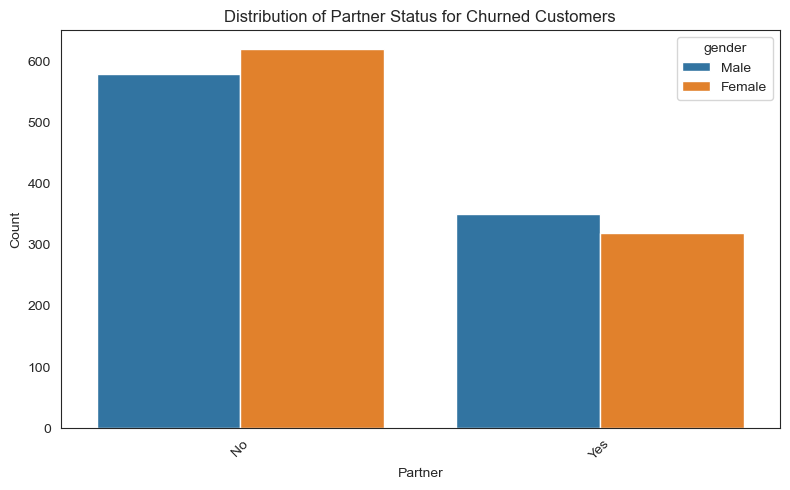

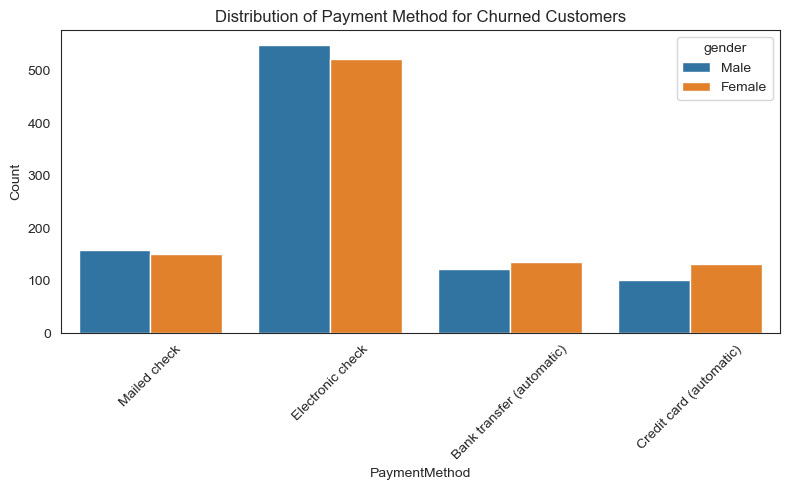

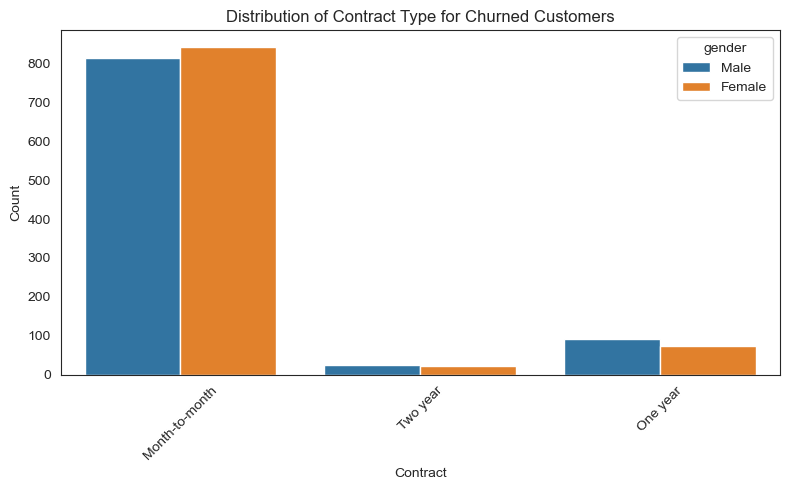

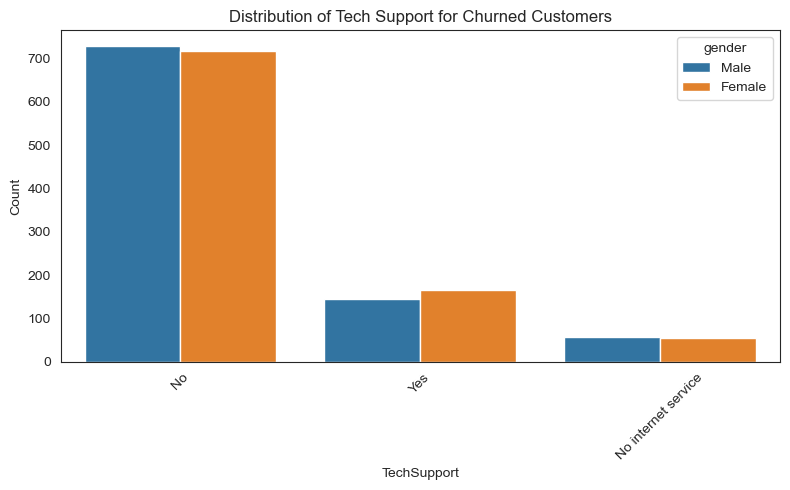

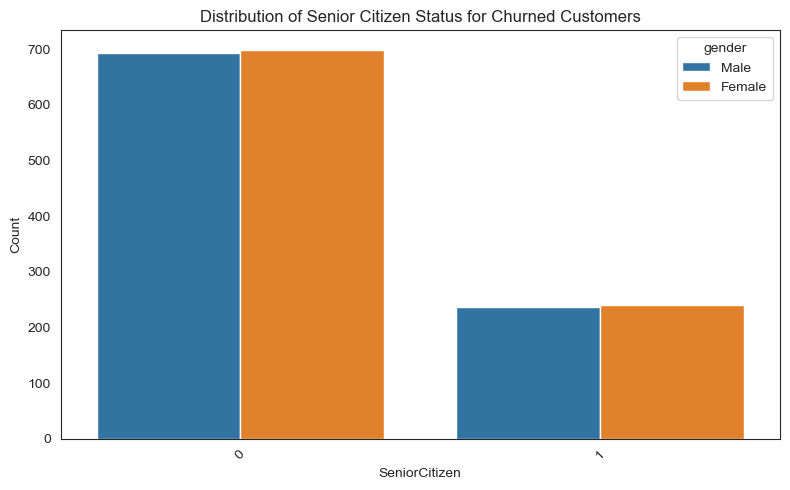

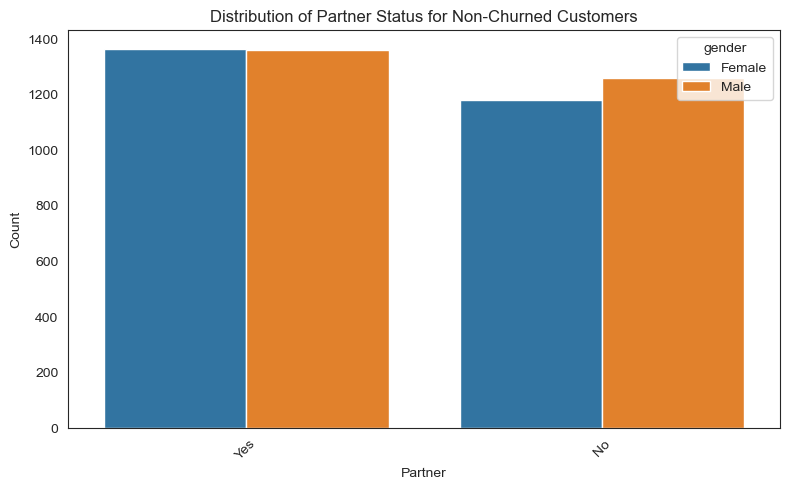

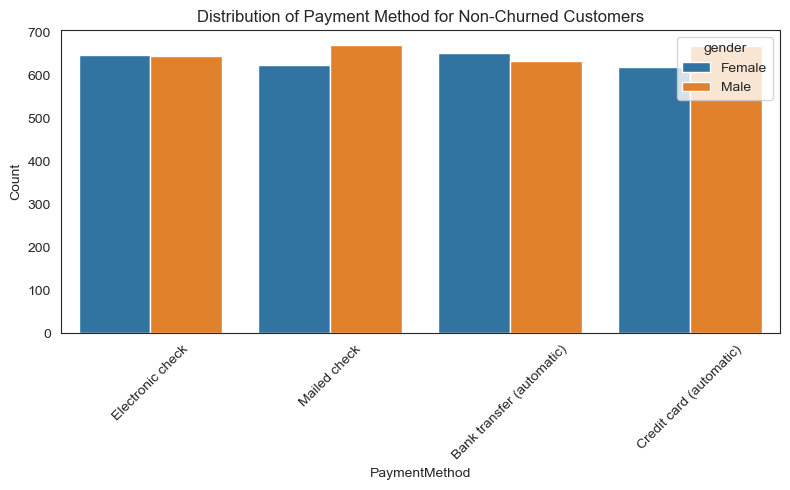

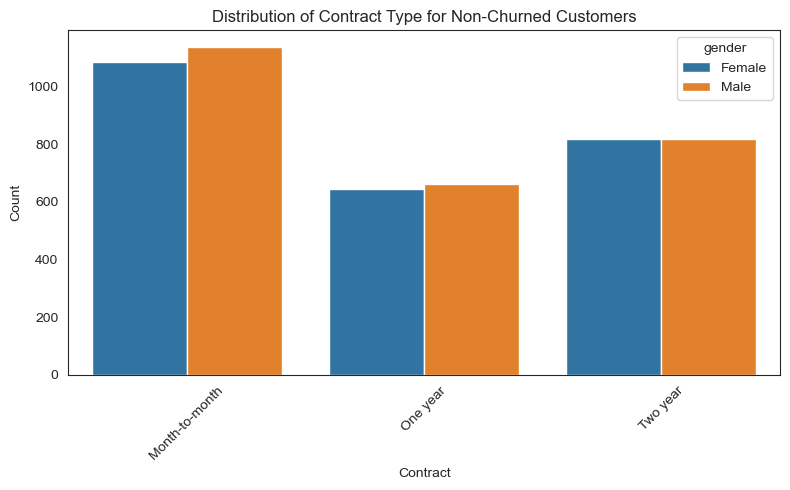

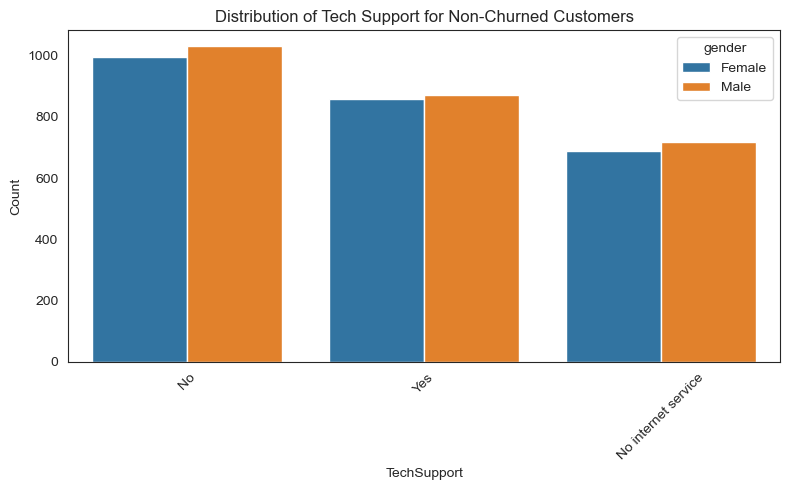

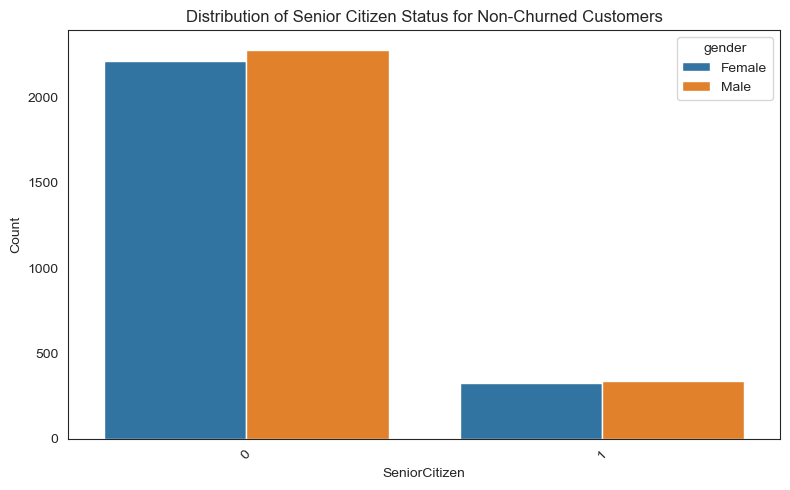

NameError: name 'df' is not defined

In [36]:
uniplot(new_df1_target1, col='Partner', title='Distribution of Partner Status for Churned Customers')
uniplot(new_df1_target1, col='PaymentMethod', title='Distribution of Payment Method for Churned Customers')
uniplot(new_df1_target1, col='Contract', title='Distribution of Contract Type for Churned Customers')
uniplot(new_df1_target1, col='TechSupport', title='Distribution of Tech Support for Churned Customers')
uniplot(new_df1_target1, col='SeniorCitizen', title='Distribution of Senior Citizen Status for Churned Customers')
uniplot(new_df1_target0, col='Partner', title='Distribution of Partner Status for Non-Churned Customers')
uniplot(new_df1_target0, col='PaymentMethod', title='Distribution of Payment Method for Non-Churned Customers')
uniplot(new_df1_target0, col='Contract', title='Distribution of Contract Type for Non-Churned Customers')
uniplot(new_df1_target0, col='TechSupport', title='Distribution of Tech Support for Non-Churned Customers')
uniplot(new_df1_target0, col='SeniorCitizen', title='Distribution of Senior Citizen Status for Non-Churned Customers')
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})


In [ ]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

def uniplot(df, col, title, hue=None, scientific_y=True):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    # Dynamic width based on number of bars (for readability)
    n_col = len(df[col].unique())
    n_hue = len(df[hue].unique()) if hue else 1
    width = n_col + 7 + 4 * n_hue

    fig, ax = plt.subplots()
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.title(title)

    # Plot with Seaborn
    sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        hue=hue,
        palette='bright',
        ax=ax
    )

    # Format y-ticks as scientific (2 × 10^2), if requested
    if scientific_y:
        ax.yaxis.set_major_formatter(mtick.ScalarFormatter())
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    else:
        ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

    plt.show()


In [ ]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

In [ ]:
def uniplot(df, col, title, hue=None):
    # Set plot style and context
    sns.set_style('white')  # Removed grid lines
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
     # Create a temporary series for hue
    temp = pd.Series(data=hue) if hue is not None else pd.Series([])
    # Create the figure and axes
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.title(title)
    # Create the countplot
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')
    
    # Remove the grid lines from the y-axis
    ax.yaxis.grid(False)
    
    # Show the plot
    plt.show()

In [ ]:
# For Churned Customers
import matplotlib.ticker as mticker
# Assuming `ax` is your axes object
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
uniplot(new_df1_target1, col='Partner', title='Distribution of Partner for Churned Customers', hue='gender')
uniplot(new_df1_target1, col='PaymentMethod', title='Payment Method for Churned Customers', hue='gender')
uniplot(new_df1_target1, col='Contract', title='Contract Type for Churned Customers', hue='gender')
uniplot(new_df1_target1, col='TechSupport', title='Tech Support for Churned Customers', hue='gender')
uniplot(new_df1_target1, col='SeniorCitizen', title='Senior Citizen for Churned Customers', hue='gender')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Sample DataFrame setup (you'll need to adjust to fit your actual data)
data = {
    'Partner': ['Yes', 'Yes', 'No', 'No', 'Yes'],
    'gender': ['Female', 'Male', 'Female', 'Male', 'Female']
}
new_df = pd.DataFrame(data)
# Set up the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='Partner', hue='gender', palette='Blues')
# Customize the plot
plt.title('Distribution of Gender for Non Churned Customers')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bivariate Analysis
# 👇 Ye part churn ko handle karega chahe 'Yes/No' ho ya 0/1
if telco_data["Churn"].dtype == "O":   # Object type => 'Yes'/'No'
    new_df1_target0 = telco_data.loc[telco_data["Churn"] == "No"]
    new_df1_target1 = telco_data.loc[telco_data["Churn"] == "Yes"]
else:  # Numeric 0/1
    new_df1_target0 = telco_data.loc[telco_data["Churn"] == 0]
    new_df1_target1 = telco_data.loc[telco_data["Churn"] == 1]

# 👇 Function for plotting
def uniplot(df, col, title, hue=None):
    sns.set_style("whitegrid")
    sns.set_context("talk")
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30

    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + (4 * (len(df[hue].unique()) if hue else 0))
    fig.set_size_inches(width, 8)

    plt.xticks(rotation=45)
    plt.title(title)
    ax = sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        hue=hue,
        palette="bright"
    )
    plt.show()

# 👇 Plot for churned customers


# 👇 Plot for non-churned customers
uniplot(
    new_df1_target0,
    col="Partner",
    title="Distribution of Gender for Non Churned Customers",
    hue="gender"
)


## CONCLUSION
These are some of the quick insights from this exercise:

Electronic check medium are the highest churners
Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
No Online security, No Tech Support category are high churners
Non senior Citizens are high churners.


In [ ]:
telco_data_dummies.to_csv('tel_churn.csv')